<a href="https://colab.research.google.com/github/Priyo-prog/Artificial-Intelligence-Projects/blob/main/AI%20in%20Marketing/marketing_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI in Marketing**

* Marketing is crucial for growth and sutainability of reatil business
* One of the key pain points is to know their customers and identify their needs.
* By understanding the customers, marketers can launch a targeted marketing campaign that is tailored for specific needs.
* Our target is to create targeted ad marketing campaign by dividing the customers into atleast 3 distinctive groups.

## **Import Important Packages and Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.graph_objects as go

from google.colab import files
%matplotlib inline

## **Mount the Drive and Make Default Drive to Upload the Dataset**

In [2]:
# mount the google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Navigate to My Drive directory make it default to upload data and store models
%cd /content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing

/content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing


In [4]:
sales_df = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence Projects/AI in Marketing/sales_data_sample.csv', encoding="unicode_escape")

In [5]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


Convert the ORDERDATE in date time format in pandas

In [7]:
sales_df["ORDERDATE"] = pd.to_datetime(sales_df["ORDERDATE"])

In [8]:
sales_df["ADDRESSLINE2"].isna().sum()

2521

Since there are lot of null value in 'addressline2', 'state', 'postal code' and 'territory' we can drop them.

In [9]:
df_drop = ["ADDRESSLINE1", "ADDRESSLINE2", "POSTALCODE", "CITY", "TERRITORY", "PHONE", 
           "STATE", "CONTACTFIRSTNAME", "CONTACTLASTNAME", "CUSTOMERNAME", "ORDERNUMBER"]
sales_df = sales_df.drop(df_drop, axis=1)
sales_df.head()           

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [10]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [11]:
# How many unique records are there in the column
sales_df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

## **Perform Exploratory Data Analysis and Data Cleaning - Part 1**

Find how many countries are there and number of samples of those countries are there in the dataset

In [12]:
sales_df["COUNTRY"].value_counts().index

Index(['USA', 'Spain', 'France', 'Australia', 'UK', 'Italy', 'Finland',
       'Norway', 'Singapore', 'Canada', 'Denmark', 'Germany', 'Sweden',
       'Austria', 'Japan', 'Belgium', 'Switzerland', 'Philippines', 'Ireland'],
      dtype='object')

In [13]:
sales_df["COUNTRY"].value_counts()

USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

In [14]:
# Function to visualize the count of items in a given number

def barplot_visualization(x):
  fig = plt.Figure(figsize=(12,6))
  fig = px.bar(x = sales_df[x].value_counts().index, 
               y = sales_df[x].value_counts(), 
               color = sales_df[x].value_counts().index, 
               height=600)
  fig.show()

In [15]:
# Let's call the function for any given column such as 'COUNTRY'

barplot_visualization("COUNTRY")

In [16]:
# How many unique order status are there ?
sales_df["STATUS"].value_counts().index

Index(['Shipped', 'Cancelled', 'Resolved', 'On Hold', 'In Process',
       'Disputed'],
      dtype='object')

In [17]:
sales_df["STATUS"].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [18]:
barplot_visualization("STATUS")

The satus shown above are mostly unbalanced since most of them are "Shipped"

In [19]:
sales_df.drop(columns=["STATUS"], inplace=True)

In [20]:
# Function to add dummy variables to replace categorical variables

def dummies(x):
  dummy = pd.get_dummies(sales_df[x])
  sales_df.drop(columns=x, inplace=True)
  return pd.concat([sales_df, dummy], axis=1)

In [21]:
# Let's obtain the dummy variables for the column "COUNTRY"

sales_df = dummies("COUNTRY")
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Italy,Japan,Norway,Philippines,Singapore,Spain,Sweden,Switzerland,UK,USA
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,...,0,0,0,0,0,0,0,0,0,1


In [22]:
sales_df = dummies("PRODUCTLINE")

In [23]:
sales_df = dummies("DEALSIZE")

### **Encoding The Categorical Variables**

In [24]:
y = pd.Categorical(sales_df["PRODUCTCODE"])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["PRODUCTCODE"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

# Passing the "sales_df" has issues it doesn't allow the Timestamp
# and other catergorical values, all have to be converted.
# Therefore creating only datframe of "PRODUCTCODE" and then concatenate
# it to original dataframe. 

product_code_df = sales_df["PRODUCTCODE"]
product_code_df = product_code_df.to_frame()

product_code_df = transformer.fit_transform(product_code_df)
type(product_code_df)

scipy.sparse.csr.csr_matrix

In [26]:
sales_df_copy = sales_df

In [27]:
print(product_code_df)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (2798, 108)	1.0
  (2799, 108)	1.0
  (2800, 108)	1.0
  (2801, 108)	1.0
  (2802, 108)	1.0
  (2803, 108)	1.0
  (2804, 108)	1.0
  (2805, 108)	1.0
  (2806, 108)	1.0
  (2807, 108)	1.0
  (2808, 108)	1.0
  (2809, 108)	1.0
  (2810, 108)	1.0
  (2811, 108)	1.0
  (2812, 108)	1.0
  (2813, 108)	1.0
  (2814, 108)	1.0
  (2815, 108)	1.0
  (2816, 108)	1.0
  (2817, 108)	1.0
  (2818, 108)	1.0
  (2819, 108)	1.0
  (2820, 108)	1.0
  (2821, 108)	1.0
  (2822, 108)	1.0


In [28]:
df = pd.DataFrame(product_code_df.todense())

In [29]:
df.head(), df.shape


(   0    1    2    3    4    5    6    7    8    9    ...  99   100  101  102  \
 0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
 
    103  104  105  106  107  108  
 0  0.0  0.0  0.0  0.0  0.0  0.0  
 1  0.0  0.0  0.0  0.0  0.0  0.0  
 2  0.0  0.0  0.0  0.0  0.0  0.0  
 3  0.0  0.0  0.0  0.0  0.0  0.0  
 4  0.0  0.0  0.0  0.0  0.0  0.0  
 
 [5 rows x 109 columns], (2823, 109))

In [30]:
# Handling curse of dimensionality using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

pca.fit(df)

PCA(n_components=1)

In [31]:
pca.components_

array([[-0.00826614, -0.01076486, -0.00706682, -0.01038167, -0.00921521,
        -0.01190374, -0.0101908 , -0.01081304, -0.01311977, -0.01047052,
        -0.00827077, -0.00985842, -0.00807942, -0.00890957, -0.01153987,
        -0.00902991, -0.01453408, -0.01053705, -0.00925421, -0.00921587,
        -0.00863758, -0.00780606, -0.00707724, -0.00900348, -0.0071959 ,
        -0.01010714, -0.00705046, -0.00962409, -0.00905049, -0.01159463,
        -0.00734097, -0.00909866, -0.00870831, -0.00958359, -0.00897872,
        -0.0097186 , -0.01185773, -0.01055457, -0.00825763,  0.9952829 ,
        -0.00907509, -0.0077167 , -0.0109117 , -0.00813157, -0.00821392,
        -0.00834121, -0.00863679, -0.00833147, -0.0075913 , -0.01070274,
        -0.01153613, -0.01210097, -0.00673703, -0.00705629, -0.00716569,
        -0.01035589, -0.01000852, -0.00769945, -0.00764131, -0.01072934,
        -0.01043491, -0.00999997, -0.00941716, -0.00944507, -0.00982964,
        -0.00759591, -0.01002103, -0.0084993 , -0.0

In [32]:
df_product_code = pca.components_
df_product_code.shape

(1, 109)

In [33]:
df_product_code

array([[-0.00826614, -0.01076486, -0.00706682, -0.01038167, -0.00921521,
        -0.01190374, -0.0101908 , -0.01081304, -0.01311977, -0.01047052,
        -0.00827077, -0.00985842, -0.00807942, -0.00890957, -0.01153987,
        -0.00902991, -0.01453408, -0.01053705, -0.00925421, -0.00921587,
        -0.00863758, -0.00780606, -0.00707724, -0.00900348, -0.0071959 ,
        -0.01010714, -0.00705046, -0.00962409, -0.00905049, -0.01159463,
        -0.00734097, -0.00909866, -0.00870831, -0.00958359, -0.00897872,
        -0.0097186 , -0.01185773, -0.01055457, -0.00825763,  0.9952829 ,
        -0.00907509, -0.0077167 , -0.0109117 , -0.00813157, -0.00821392,
        -0.00834121, -0.00863679, -0.00833147, -0.0075913 , -0.01070274,
        -0.01153613, -0.01210097, -0.00673703, -0.00705629, -0.00716569,
        -0.01035589, -0.01000852, -0.00769945, -0.00764131, -0.01072934,
        -0.01043491, -0.00999997, -0.00941716, -0.00944507, -0.00982964,
        -0.00759591, -0.01002103, -0.0084993 , -0.0

In [34]:
df_product_code = pd.DataFrame(df_product_code)
df_product_code.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-0.008266,-0.010765,-0.007067,-0.010382,-0.009215,-0.011904,-0.010191,-0.010813,-0.01312,-0.010471,...,-0.00918,-0.009987,-0.011419,-0.009546,-0.007372,-0.009543,-0.009612,-0.00872,-0.010123,-0.008735


In the above process we had to check the shape of the "df" and then do PCA for . Since we missed it we will go originally by dataframe codes.

In [35]:
# Since the number of unique product code is 109, if we add one-hot variables,
# there would be additional 109 columns, we can avoid that by using categorical encoding.
# This is not the optimal way of dealing with it but it is important to avoid curse of dimensionality.

sales_df["PRODUCTCODE"] = pd.Categorical(sales_df["PRODUCTCODE"]).codes

In [36]:
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0


## **Perform Exploratory Data Analysis - Part 2**

In [37]:
# Group data by order date

sales_df_group = sales_df.groupby(by="ORDERDATE").sum()
sales_df_group.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
ORDERDATE,,,,,,,,,,,,,,,,,,,,,
2003-01-06,151,288.78,10,12133.25,4,4,8012,363,174.0,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-09,142,284.96,10,11432.34,4,4,8012,372,181.0,0,...,0,0,0,0,0,0,4,0,2,2
2003-01-10,80,150.14,3,6864.05,2,2,4006,155,37.0,0,...,0,0,0,0,0,0,2,0,1,1
2003-01-29,541,1417.54,136,54702.00,16,16,32048,1695,723.0,0,...,3,0,0,0,0,7,6,0,10,6
2003-01-31,443,1061.89,91,44621.96,13,13,26039,1365,720.0,0,...,7,0,0,0,2,4,0,0,8,5


When does the sales generally peak(which month) ?

In [38]:
fig = px.line(x=sales_df_group.index, y=sales_df_group.SALES, title="Monthly Sales")
fig.show()

In [39]:
# We drop the 'ORDERDATE' and keep the rest of the date related data such as 'MONTH'
sales_df.drop("ORDERDATE", axis=1, inplace=True)
sales_df.shape

(2823, 38)

Plot the correlation matrix between the variables

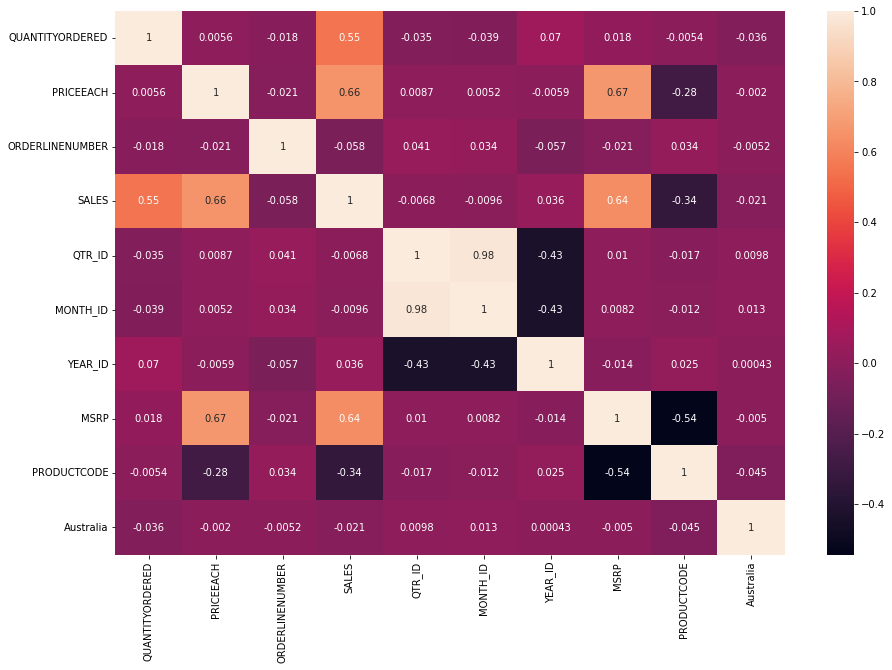

In [40]:
plt.figure(figsize=(15,10))
corr_matrix = sales_df.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot=True)

In [41]:
# It looks Quarter IDs and the Monthly IDs are highly correlated
# Let's drop the 'QTR_ID' (or 'MONTH_ID')
sales_df.drop("QTR_ID", axis=1, inplace=True)
sales_df.shape

(2823, 37)

In [42]:
# Let's plot distplots
# Distplots shows the (1) Histogram (2) kde plot and (3) rug plot
# (1) Histogram : it's a graphical display of data using bars with various heights.
# (2) Kde plot : Kernal Density Estimate is used for visualizing the Probability Density of a continuous variable.
# (3) Rug Plot : plot of data for a single quantitative variable, displayed as marks along an axis (one dimensional scatter plot)

import plotly.figure_factory as ff

plt.figure(figsize=(15,10))

for i in range(8):
  if sales_df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([sales_df[sales_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text=sales_df.columns[i])
    fig.show()

<Figure size 1080x720 with 0 Axes>

In [43]:
# Visualize the relationship between the variables using pairplots
plt.figure(figsize=(15,10))

fig = px.scatter_matrix(sales_df,
                        dimensions=sales_df.columns[:8], color="MONTH_ID")

fig.update_layout(
    title="Sales Data",
    width=1500,
    height=1100)
fig.show()

<Figure size 1080x720 with 0 Axes>

From the above pairplot we can derive the following points :

* A trend exists between 'SALES' and 'QUANTITYORDERED'
* A trend exists between 'MSRP' and 'PRICEEACH'
* A trend exists between 'PRICEEACH' and 'SALES'
* It seems that the sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs 'YEAR_ID')

## **Find the Optimal Numbers of Clusters Using Elbow Method**

* The Elbow method is the heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
* If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [44]:
# Scale the data
scaler = StandardScaler()
sales_df_scaled = scaler.fit_transform(sales_df)

In [45]:
sales_df_scaled.shape

(2823, 37)

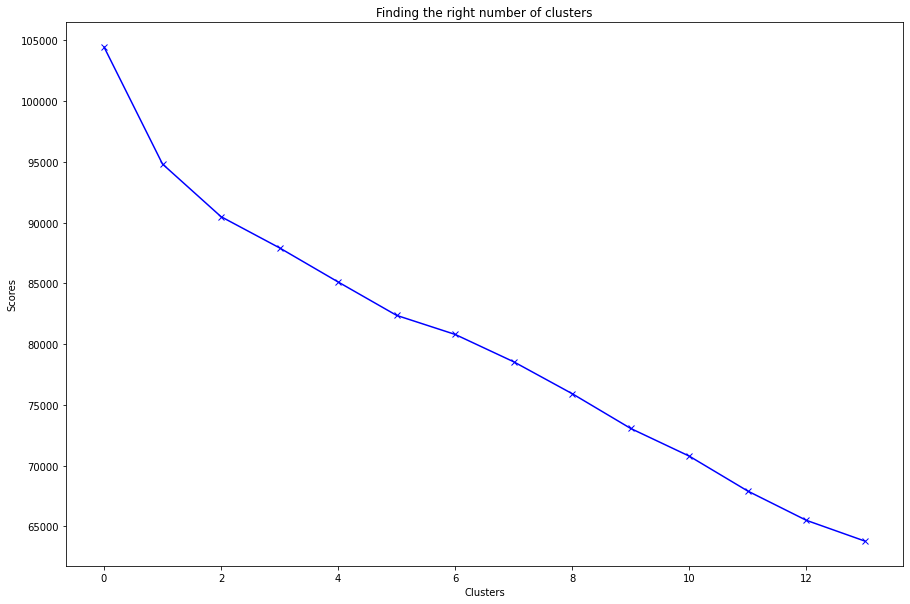

In [46]:
scores = []

range_values = range(1,15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(sales_df_scaled)
  scores.append(kmeans.inertia_) # Inertia is the sum of squared differences of samples to their closest cluster center

plt.figure(figsize=(15,10))
plt.plot(scores, 'bx-')
plt.title("Finding the right number of clusters")
plt.xlabel("Clusters")
plt.ylabel("Scores")
plt.show()  

The above graph shows when Clusters are increased the WBCSS(Within Cluster Sum of Squares) is dropping but in linear fashion, so it is hard to find an **"elbow"**. So we are going to apply an "autoencoder" deep learning algorithm to overcome this.

## **Apply K-Means Method**

In [47]:
# Cluster the data using K-Means

kmeans = KMeans(5)
kmeans.fit(sales_df_scaled)
labels = kmeans.labels_

In [48]:
labels

array([4, 4, 2, ..., 3, 3, 3], dtype=int32)

In [49]:
kmeans.cluster_centers_.shape

(5, 37)

In [50]:
# Let's take a look at a cluster center

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.191867,-0.057456,-0.010199,0.033722,-0.277772,-0.945247,-0.068541,0.074165,-0.264819,-0.140961,...,0.331795,0.472398,0.269920,-0.300637,-0.167454,-0.345470,-0.429753,-0.074847,0.096424,-0.062363
1,-0.044700,-0.130766,0.230356,-0.286598,-0.108576,0.185186,-0.369764,0.900399,0.084748,-0.015785,...,-0.721812,-0.364452,2.868012,-0.300637,-0.167454,-0.345470,-0.523371,-0.152081,-0.170861,0.241554
2,0.349706,0.645161,-0.079724,0.741026,0.007770,-0.005285,0.602751,-0.449527,-0.012840,0.037272,...,0.283940,0.049510,-0.318958,-0.300637,-0.039848,0.108489,0.010661,0.261192,0.784066,-0.907462
3,-0.037171,0.009763,0.078809,-0.271913,-0.043991,0.001642,-0.363043,1.126176,-0.230280,-0.017283,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.066000,0.177967
4,-0.448861,-0.821603,0.019295,-0.837964,0.039796,-0.023038,-0.604490,0.059761,0.054316,-0.037072,...,0.000044,0.116936,-0.348674,-0.300637,0.147379,0.049985,0.277997,-0.242672,-0.980703,1.096370


In [51]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,36.961538,82.499615,6.423077,3615.989615,6.076923,2003.153846,97.961538,56.115385,1.387779e-17,-3.469447e-18,...,5.000000e-01,2.692308e-01,1.923077e-01,-1.387779e-17,0.000000e+00,-1.387779e-17,3.846154e-02,3.846154e-02,5.384615e-01,0.423077
1,34.657439,81.020900,7.439446,3026.107336,6.695502,2003.944637,85.858131,82.207612,8.650519e-02,1.730104e-02,...,1.110223e-16,-3.747003e-16,1.000000e+00,2.775558e-17,-1.006140e-16,-1.387779e-17,4.996004e-16,2.076125e-02,4.048443e-01,0.574394
2,38.498845,96.671886,6.129330,4918.517252,7.120862,2003.811393,124.934565,39.577367,6.235566e-02,2.463433e-02,...,4.772902e-01,1.331794e-01,9.237875e-03,5.551115e-16,2.078522e-02,1.401078e-01,2.193995e-01,1.154734e-01,8.822171e-01,0.002309
3,34.730769,83.855470,6.799145,3053.150128,6.931624,2003.816239,86.128205,89.337607,8.547009e-03,1.709402e-02,...,4.996004e-16,-2.220446e-16,1.249001e-16,1.000000e+00,-1.110223e-16,1.249001e-16,4.718448e-16,-1.595946e-16,4.572650e-01,0.542735
4,30.721026,67.086236,6.547692,2010.745703,7.237949,2003.798974,76.426667,55.660513,7.897436e-02,1.435897e-02,...,3.425641e-01,1.548718e-01,3.747003e-16,9.714451e-16,5.128205e-02,1.220513e-01,3.292308e-01,4.926615e-16,-1.054712e-15,1.000000


The explanation of above data :

* **Cluster 0 (Highest)** - This group represents the customers who buys items in high quantity centered around ~47, they buy items in all price range leaning towards high price items of ~99. They also correspond to the highest total sales around ~8296 and they are active throughout the year. They are the highest buyers of products with high MSRP ~158.

* **Cluster 1** - This group represents customers who buy items in varying quantity ~35, they tend to buy high price items ~96. Their sales is bit better average ~4435, they buy products with second highest MSRP of ~133.

* **Cluster 2 (lowest)** - This group represents customers who buy items in low quantity ~30. They tend to buy low price items ~68. Their sales ~2044 is lower than other clusters and they are extremely active around holiday season. They buy products with low MSRP ~75.

* **Cluster 3** - This group represents customers who are only active during the holidays. they buy in lower quantity ~35, but they tend to buy average price items around ~86. They also correspond to lower total sales around ~3673, they tend to buy items with MSRP around 102.

* **Cluster 4** - This group represents customers who buy items in varying quantity ~39, they tend to buy average price items ~94. Their sales ~4280.

In [52]:
labels.shape

(2823,)

In [53]:
labels.max(), labels.min()

(4, 0)

## **Predict the Data**

In [54]:
y_kmeans = kmeans.fit_predict(sales_df_scaled)
y_kmeans

array([0, 0, 2, ..., 1, 0, 2], dtype=int32)

In [55]:
sales_df_scaled[0:10, :]

array([[-0.52289086,  0.5969775 , -1.05705871, -0.37082523, -1.39290889,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099, -0.3537647 ,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348,  1.34601374, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
        -0.98070333,  1.09637041],
       [-0.11220131, -0.11445035, -0.34701507, -0.42789707, -0.57233673,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099,  2.82673767,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063

In [56]:
y_temp_pred = kmeans.fit_predict([[-0.11220131, -0.11445035, -0.34701507, -0.42789707, -0.57233673,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099,  2.82673767,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
        -0.98070333,  1.09637041],
        [ 0.60650538,  0.81015797,  1.78311584,  0.62694899, -1.66643294,
         0.26432802, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099,  2.82673767,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
         1.01967636, -0.9121005 ],
         [ 1.32521208,  0.81015797, -1.29373992,  1.06347522,  1.06880759,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099, -0.3537647 ,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828,  5.67554092,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
         1.01967636, -0.9121005 ],
          [ 1.42788447,  0.81015797,  1.78311584,  0.89673966,  0.79528354,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099, -0.3537647 ,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348,  1.34601374, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
         1.01967636, -0.9121005 ],
         [-0.11220131, -0.11445035, -0.34701507, -0.42789707, -0.57233673,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099,  2.82673767,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828, -0.17619466,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
        -0.98070333,  1.09637041]])

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.



In [57]:
y_temp_pred1 = kmeans.predict([[ 1.32521208,  0.81015797, -1.29373992,  1.06347522,  1.06880759,
        -1.16517009, -0.14224584, -1.70278009, -0.26481859, -0.14096078,
        -0.10875641, -0.15945785, -0.15108305, -0.18354099, -0.3537647 ,
        -0.14985203, -0.07549858, -0.20419945, -0.13698828,  5.67554092,
        -0.09641408, -0.16967642, -0.37127839, -0.14355269, -0.10537149,
        -0.23184348, -0.74293447, -0.72181225,  2.74384783, -0.34867363,
        -0.30063664, -0.16745383, -0.34547029, -0.52337077, -0.24267205,
         1.01967636, -0.9121005 ]])

In [58]:
y_temp_pred1

array([0], dtype=int32)

The **fit_predict()** method takes atleast **5** inputs. The **predict()** method can take **1** input and predict which cluster the data lies.

In the above variabale **y_temp_pred1** we see that the data lies in the **0** **cluster**.

In [59]:
y_kmeans.shape

(2823,)

In [60]:
# Add a label (which cluster) corresponding to each data point
sale_df_cluster = pd.concat([sales_df, pd.DataFrame({'cluster': labels})], axis=1)
sale_df_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,cluster
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,4
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,4
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,...,0,0,1,0,0,0,0,0,1,3
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,1,0,3
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,...,0,0,1,0,0,0,0,0,1,3


In [61]:
sales_df["ORDERLINENUMBER"] = sales_df["ORDERLINENUMBER"].apply(lambda x : float(x))

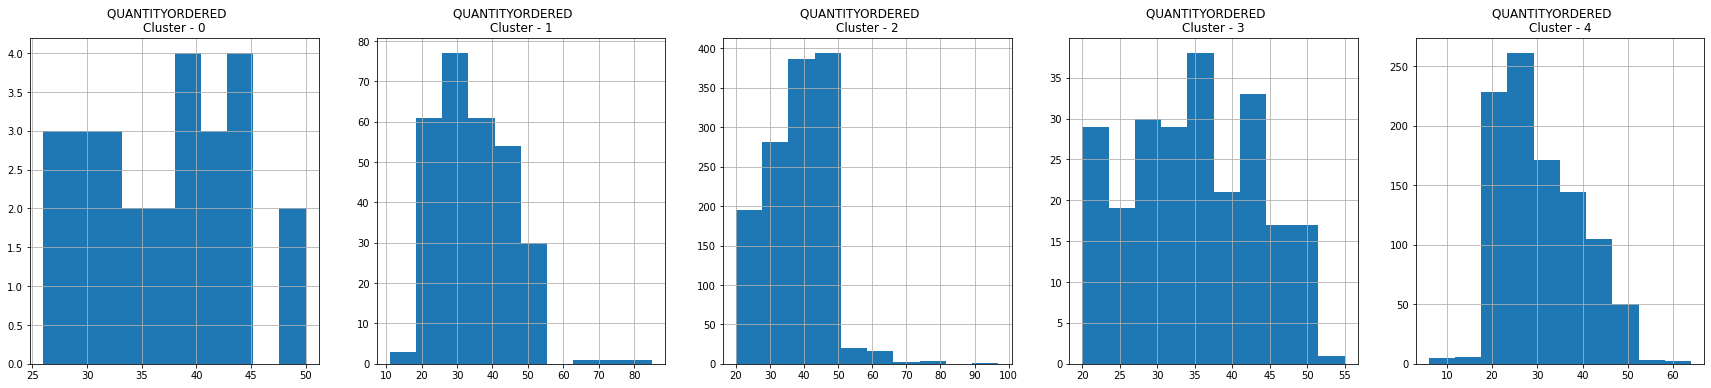

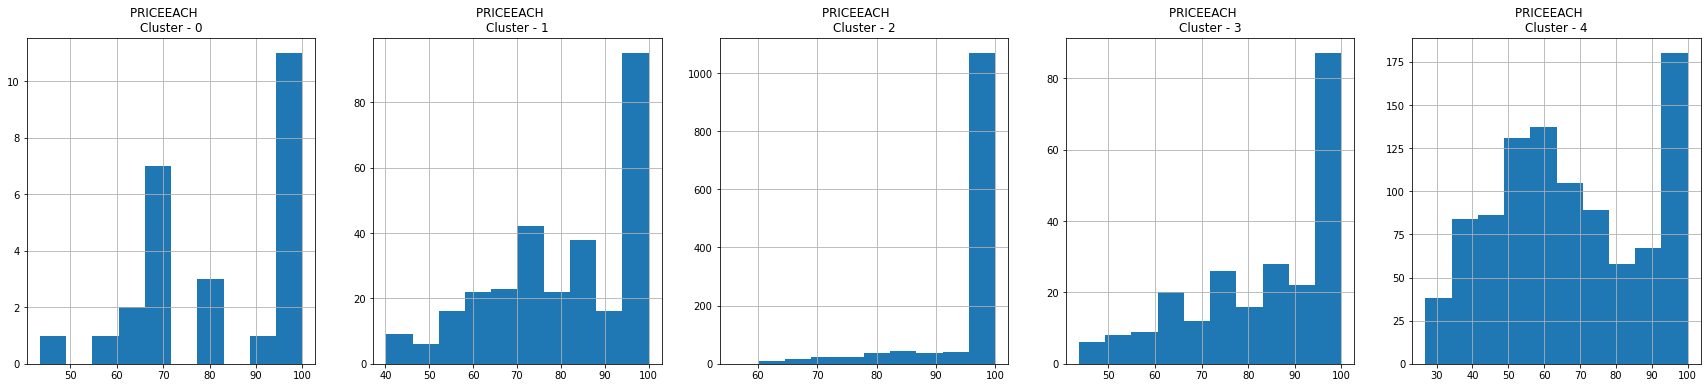

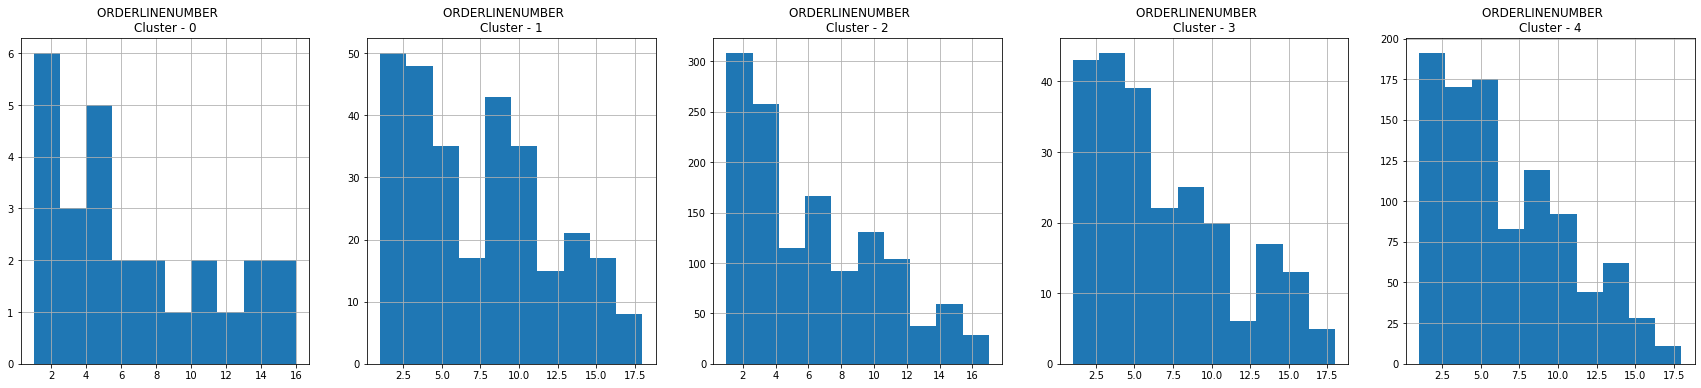

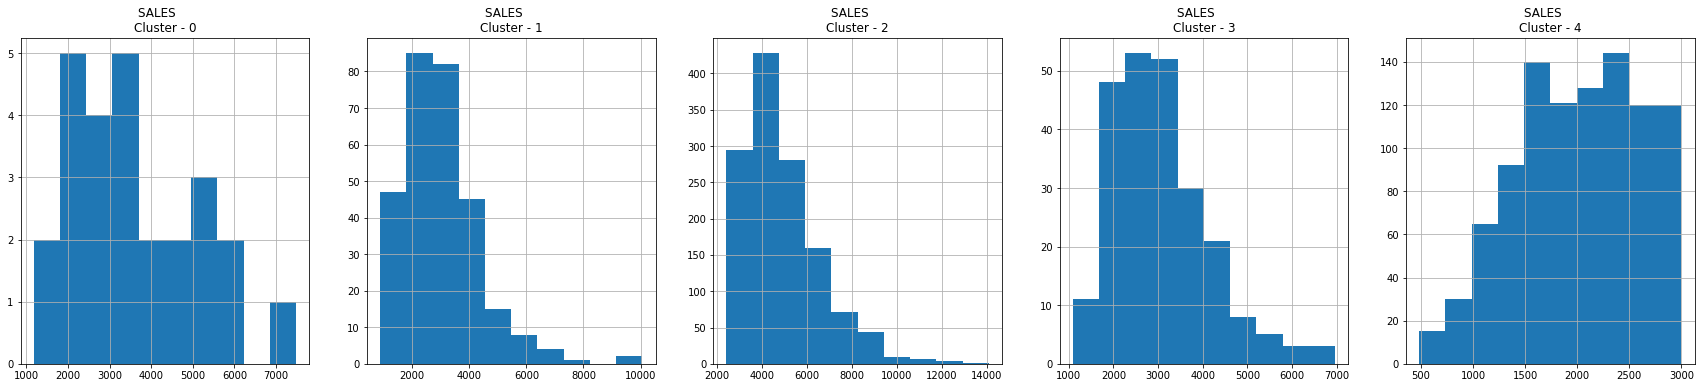

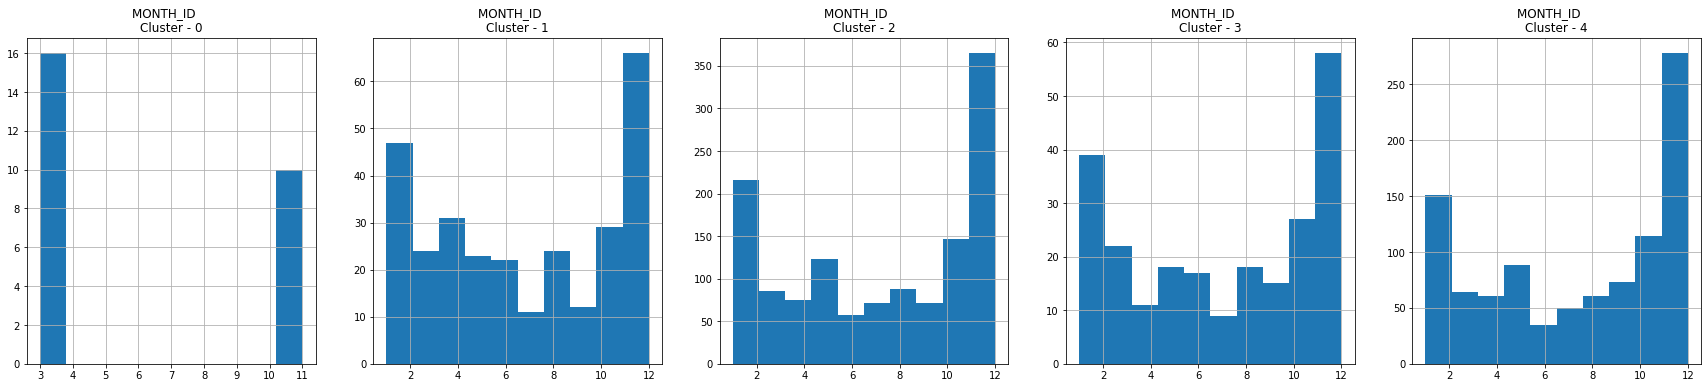

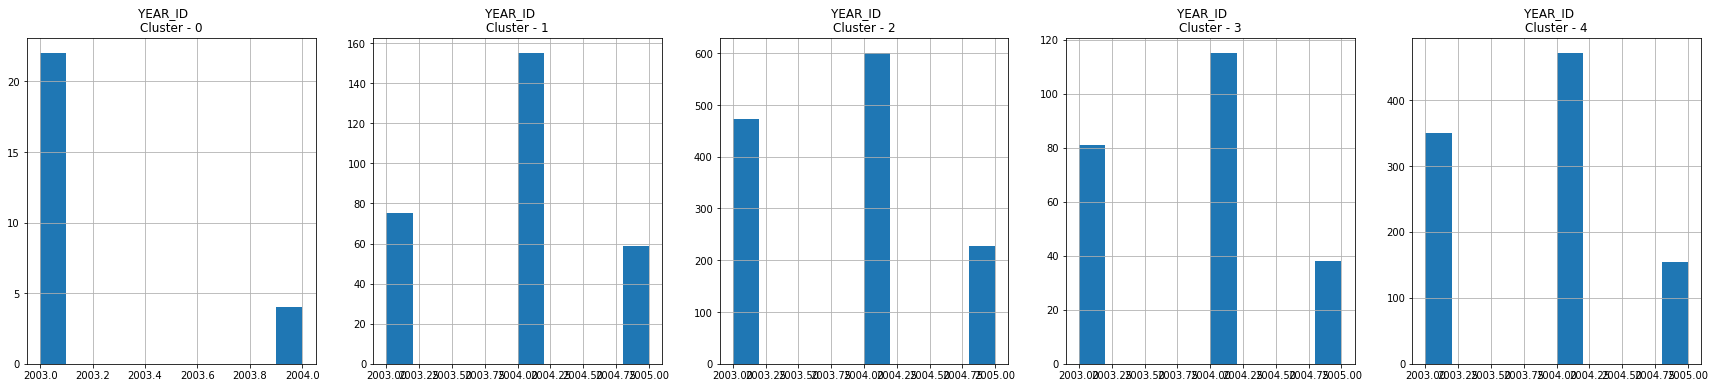

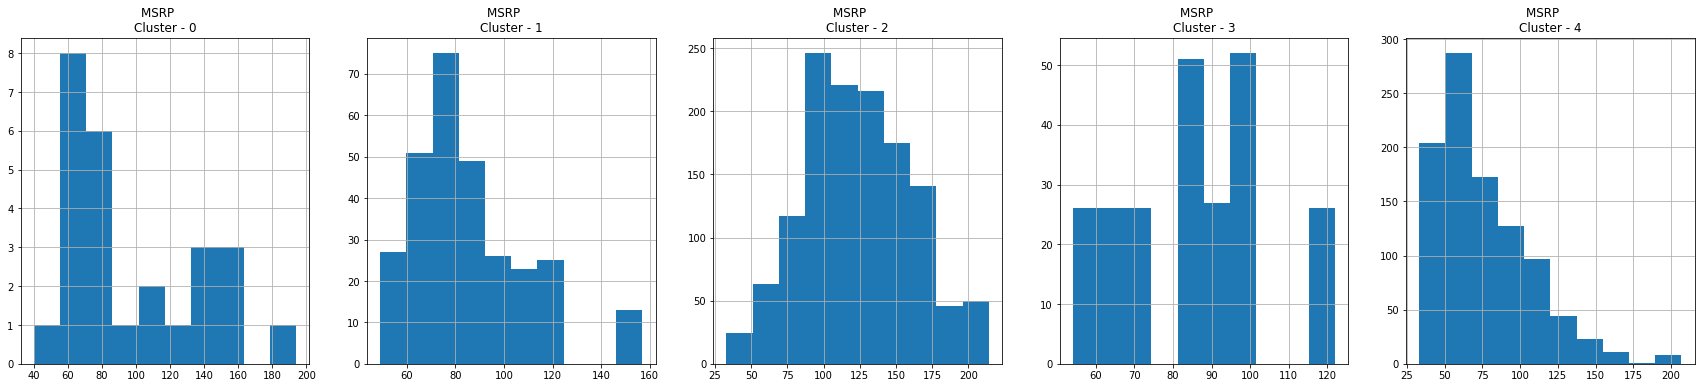

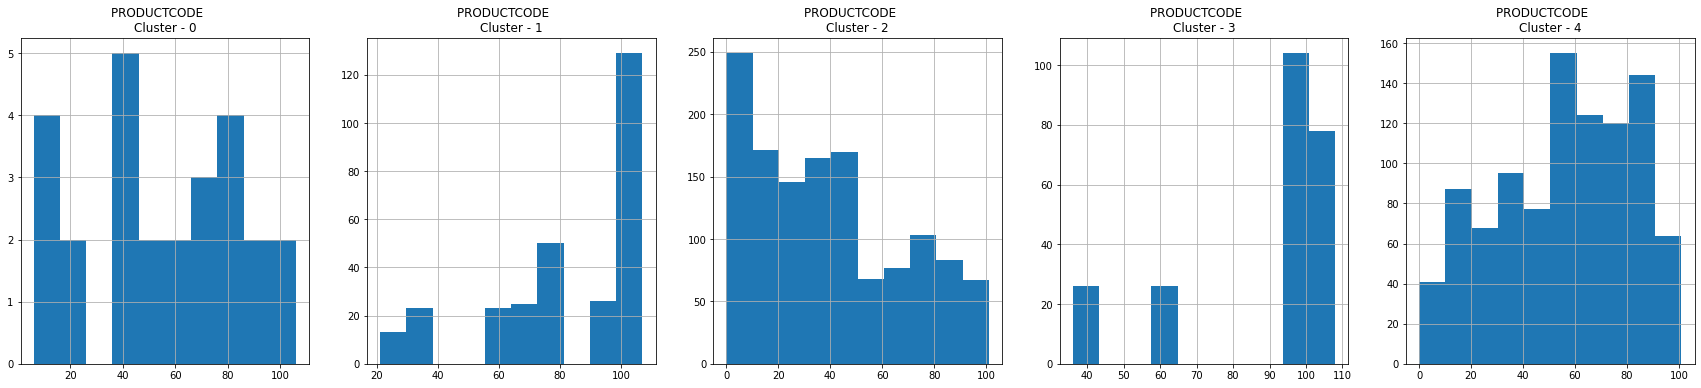

In [62]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize=(30,6))
  for j in range(5):
    plt.subplot(1,5, j+1)
    cluster = sale_df_cluster[sale_df_cluster["cluster"] == j]
    cluster[i].hist()
    plt.title(f"{i}    \nCluster - {j}")
  plt.show()  

## **Using PCA (Principal Component Analysis)**

PCA is used along with clustering algorithms so that the dimension can be reduced. 

In [63]:
# Reduce the original data to 3 dimensions using PCA for visualizing the clusters 
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(sales_df_scaled)
principal_comp

array([[-0.48618921, -1.27924421,  0.8583913 ],
       [-0.78450098, -1.20516689,  1.23111851],
       [ 1.43162885, -0.03999362,  0.12647961],
       ...,
       [ 0.3899884 ,  4.11346524, -0.1673016 ],
       [-2.78862853,  2.2339158 ,  1.28183215],
       [-0.70546849,  3.27007867, -0.59468762]])

In [64]:
# Create a dataframe after reducing the original dataset with PCA
pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2", "pca3"])
pca_df.head()

,pca1,pca2,pca3
0,-0.486189,-1.279244,0.858391
1,-0.784501,-1.205167,1.231119
2,1.431629,-0.039994,0.126480
3,1.288458,-0.282324,-0.620523
4,1.975950,-0.205956,-1.041231


In [65]:
# Concatenate the cluster labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis=1)
pca_df

,pca1,pca2,pca3,cluster
0,-0.486189,-1.279244,0.858391,4
1,-0.784501,-1.205167,1.231119,4
2,1.431629,-0.039994,0.126480,2
3,1.288458,-0.282324,-0.620523,2
4,1.975950,-0.205956,-1.041231,2
...,...,...,...,...
2818,-2.450248,1.077556,-1.660970,3
2819,-0.158197,3.610156,0.634759,3
2820,0.389988,4.113465,-0.167302,3
2821,-2.788629,2.233916,1.281832,3


In [66]:
# Visualize clusters using 3-D Scatterplots
fig = px.scatter_3d(pca_df, x="pca1", y="pca2", z="pca3",
                    color="cluster", symbol="cluster", size_max=18, opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

## **The Autoencoders**

* Auto encoders are a type of Artificial Neural Networks that are used to perform a task of data encoding (representation learning).

* Auto encoders uses the same input data for input and ooutput.

**The Code Layer**

* Autoencoders work by adding a bottleneck in the network.

* This bottleneck forces the network to create a compressed (encoded) version of the original input.

* Auto encoders work well if correlations exists between input data (performs pooorly if all the input data is independent). Thereason is if there are 2 or 3 features which have strong correlation, then we can pass only 1 for expected information

## Apply Autoencoders (Perform Dimensionality Reduction Using Autoencoders)

In [67]:
# Our original dataframe shape
sales_df.shape

(2823, 37)

In [68]:
from keras.optimizers import SGD

# Glorot uniform initializer
input_df = Input(shape=(37,))
x = Dense(50, activation="relu")(input_df)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)
encoded = Dense(8, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(encoded)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
decoded = Dense(37, kernel_initializer="glorot_uniform")(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [69]:
# Since we are using autoencoders for dimensionality reduction 
# we are having same input and output so we are pushing 'sales_df'
# two times to the fit method.
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [70]:
autoencoder.save_weights('autoencoder_1.h5')

In [72]:
pred = encoder.predict(sales_df_scaled)

89/89 [==============================] - 0s 3ms/step


### **Apply KMeans Once Again**

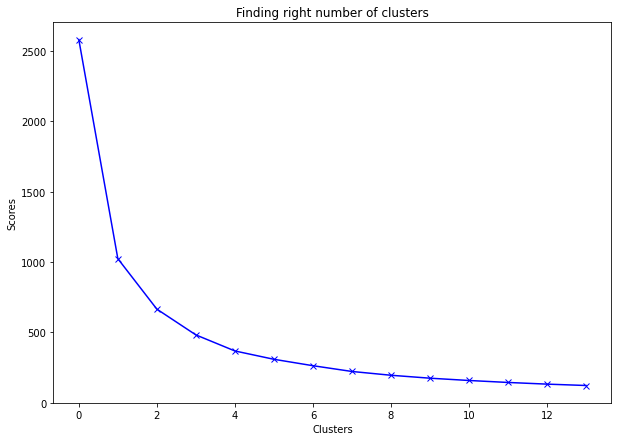

In [74]:
scores = []

range_values = range(1,15)

for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel("Clusters")  
plt.ylabel("Scores")
plt.show()

In [75]:
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(sales_df_scaled)

In [76]:
df_cluster_dr = pd.concat([sales_df, pd.DataFrame({"Cluster": labels})], axis=1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,Cluster
0,30,95.70,2.0,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,34,81.35,5.0,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,41,94.74,2.0,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,45,83.26,6.0,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,49,100.00,14.0,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [77]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0.287646,0.742097,-0.046335,1.097963,0.032917,-0.046731,1.179142,-0.792221,-0.077317,0.136868,...,1.146022,-0.220227,-0.297207,-0.300637,-0.157631,-0.309181,-0.429903,0.846448,0.472372,-0.863897
1,0.441855,0.503532,-0.030254,0.370424,-0.035278,0.049366,0.039478,0.118163,0.017313,-0.063247,...,-0.522634,0.122994,0.093577,0.116205,0.003997,0.263566,0.159003,-0.237985,1.017528,-0.912100
2,-0.466571,-0.736069,0.045087,-0.813805,0.009684,-0.013223,-0.610669,0.303969,0.025418,-0.021041,...,-0.181288,0.018259,0.077848,0.062913,0.074821,-0.041154,0.095231,-0.242672,-0.980703,1.096370


In [78]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,37.894400,98.627168,6.270400,5575.830336,7.212800,2003.782400,148.094400,28.755200,0.046400,0.038400,...,0.886400,0.046400,0.016000,9.159340e-16,0.001600,0.011200,0.038400,2.496000e-01,7.264000e-01,2.400000e-02
1,39.396348,93.815134,6.338346,4236.038872,6.963480,2003.849624,102.301826,57.504834,0.069817,0.010741,...,0.094522,0.156821,0.137487,1.149302e-01,0.027927,0.187970,0.280344,1.074114e-03,9.989259e-01,3.497203e-15
2,30.548540,68.811523,6.656669,2055.234964,7.127861,2003.805841,76.178374,63.372534,0.071823,0.016575,...,0.256511,0.123125,0.132597,1.002368e-01,0.039463,0.093923,0.254144,6.869505e-16,-1.054712e-15,1.000000e+00


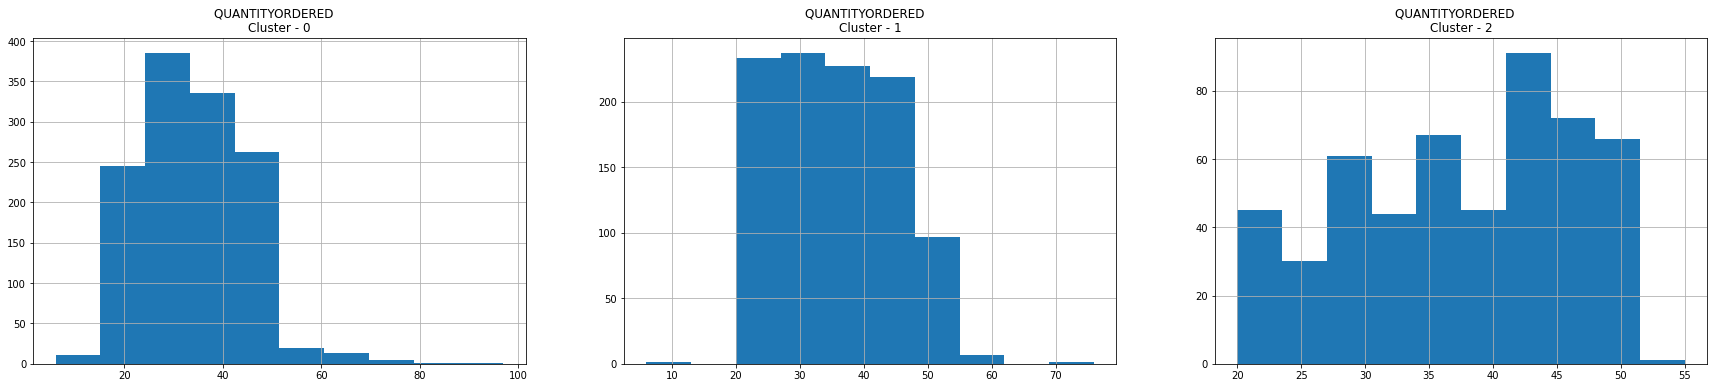

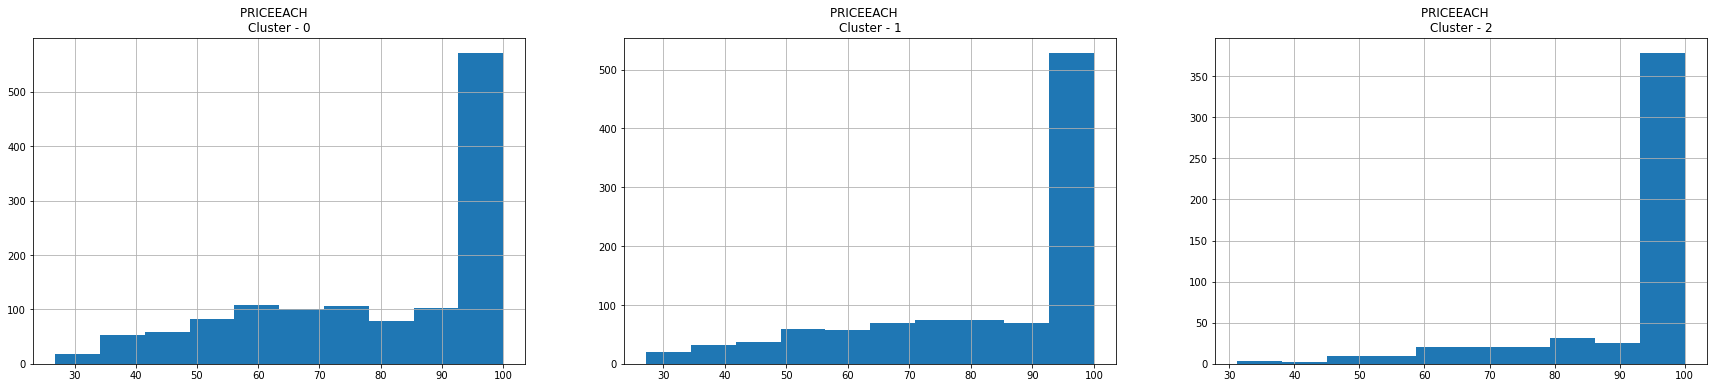

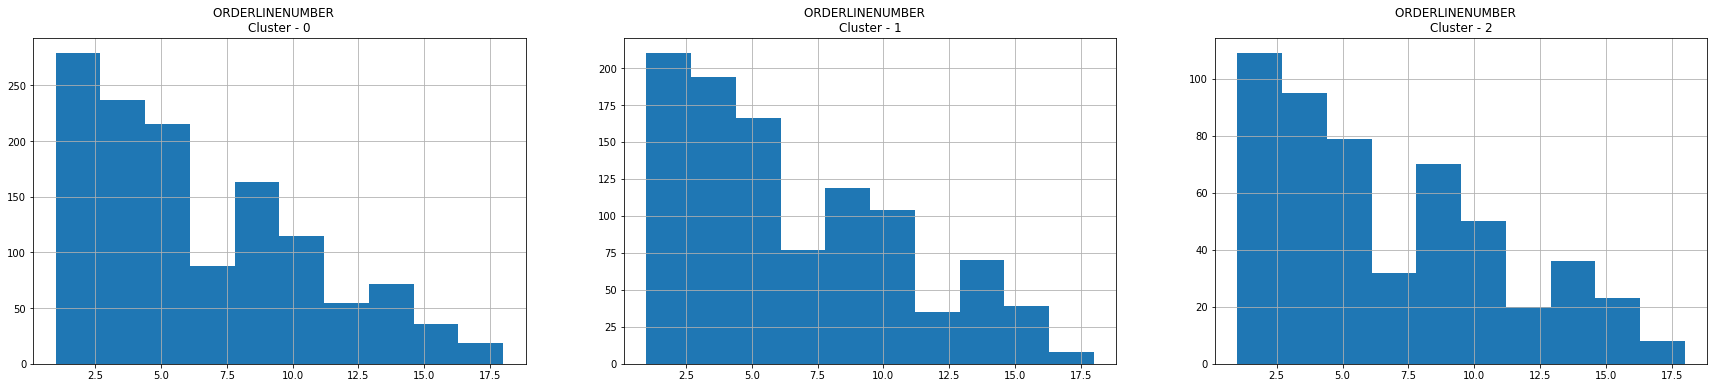

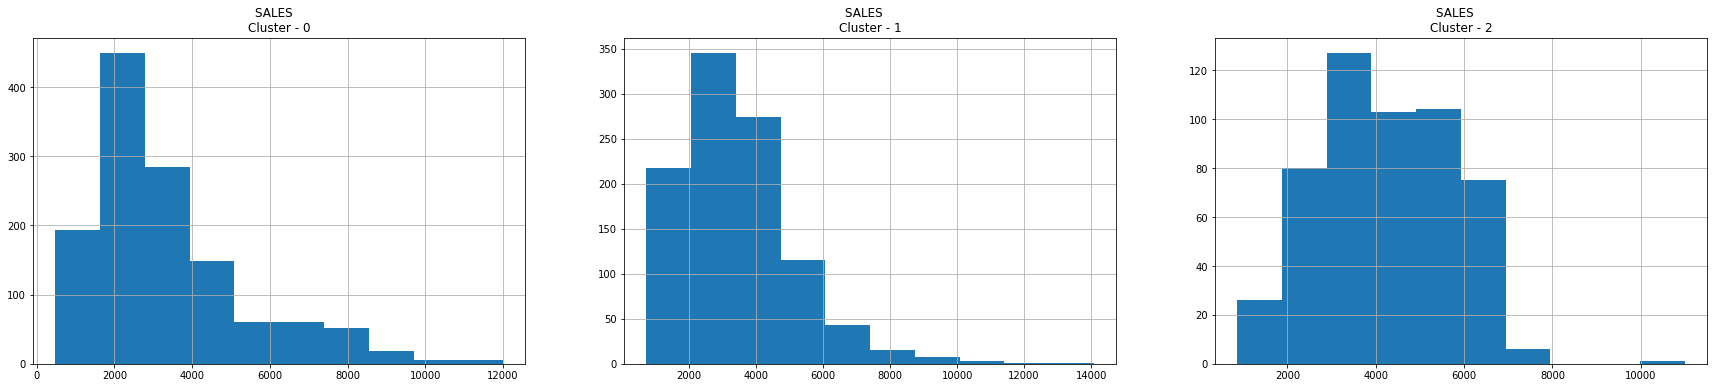

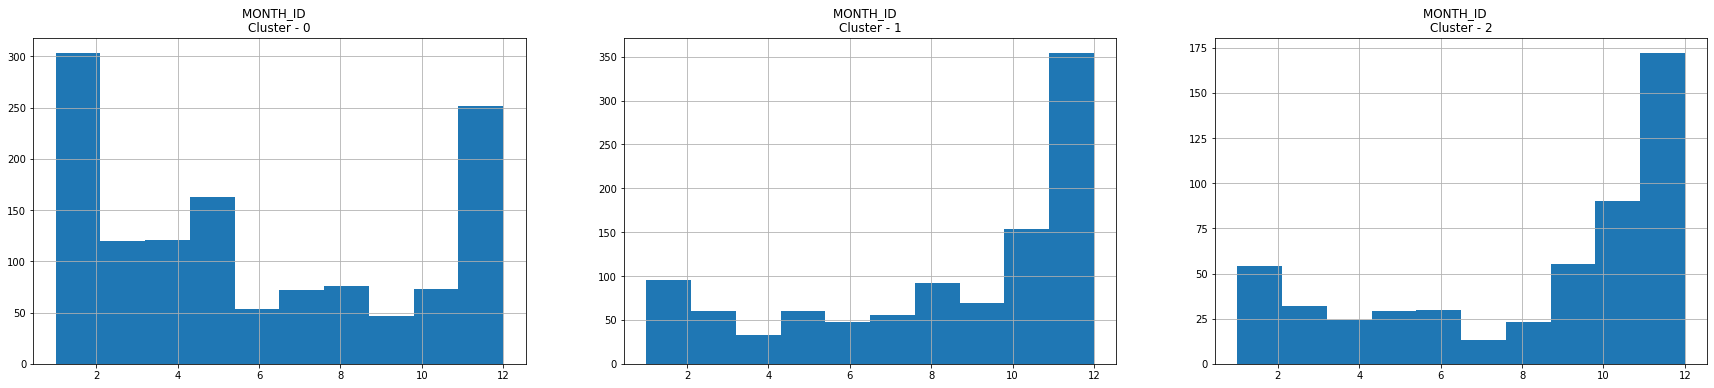

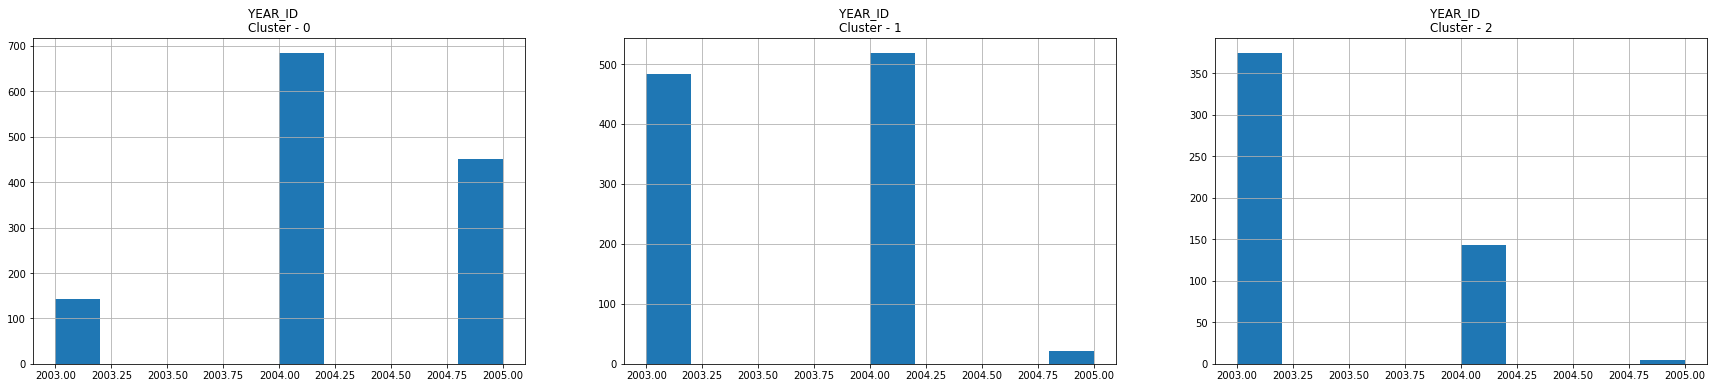

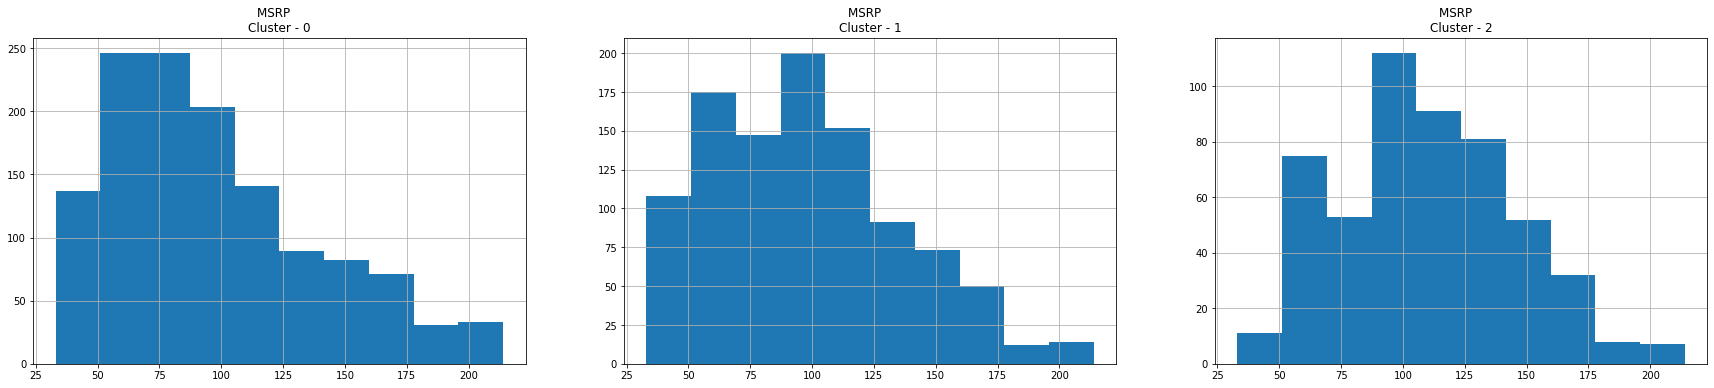

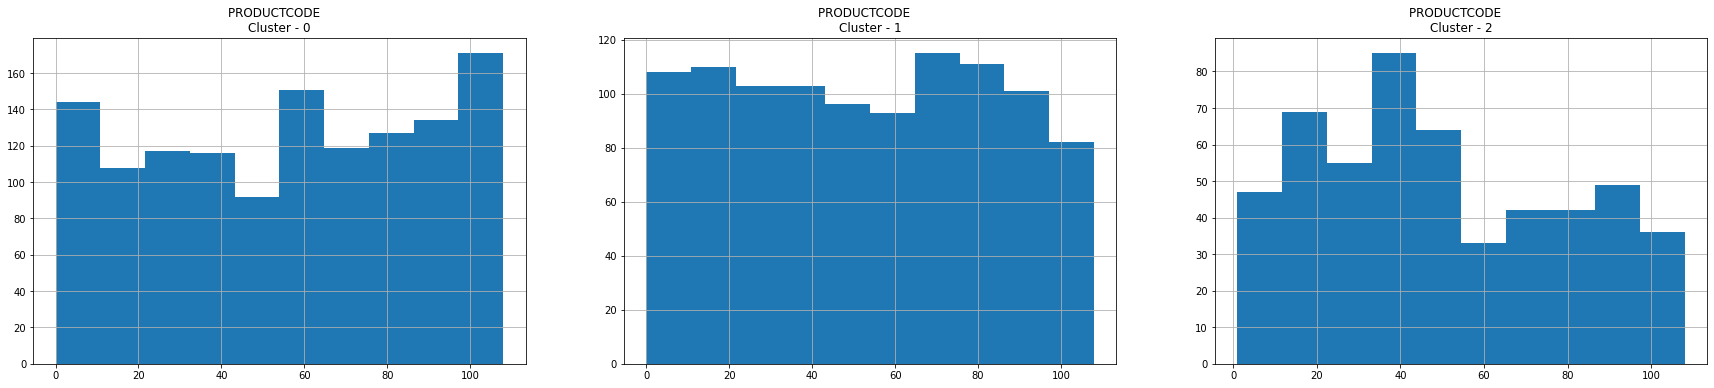

In [81]:
# plot histogram for each feature based on cluster
for i in sales_df.columns[:8]:
  plt.figure(figsize=(30,6))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df_cluster_dr[df_cluster_dr["Cluster"] == j]
    cluster[i].hist()
    plt.title(f"{i}   \nCluster - {j}")

  plt.show()  

### **Apply PCA Once Again**

In [82]:
# Reduce the original data to 3 dimensions using PCA for visualizing the clusters 
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(sales_df_scaled)
prin_comp

array([[-0.48627366, -1.18901445,  1.00912629],
       [-0.78469405, -1.03193392,  1.45568008],
       [ 1.43144043,  0.11673101,  0.32800083],
       ...,
       [ 0.38981648,  4.13167575, -0.01052187],
       [-2.78891051,  2.37753246,  1.57324194],
       [-0.70547643,  3.31473937, -0.48858938]])

In [83]:
pca_df = pd.DataFrame(data=prin_comp, columns=["pca1", "pca2", "pca3"])
pca_df.head()

,pca1,pca2,pca3
0,-0.486274,-1.189014,1.009126
1,-0.784694,-1.031934,1.455680
2,1.431440,0.116731,0.328001
3,1.288460,-0.212764,-0.538774
4,1.976028,-0.128932,-1.004559


In [84]:
# Concatenate the cluster labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis=1)
pca_df

,pca1,pca2,pca3,cluster
0,-0.486274,-1.189014,1.009126,1
1,-0.784694,-1.031934,1.455680,0
2,1.431440,0.116731,0.328001,1
3,1.288460,-0.212764,-0.538774,1
4,1.976028,-0.128932,-1.004559,1
...,...,...,...,...
2818,-2.450408,1.127103,-1.450992,1
2819,-0.158217,3.684549,0.512275,0
2820,0.389816,4.131676,-0.010522,0
2821,-2.788911,2.377532,1.573242,0


In [85]:
# Visualize clusters using 3-D Scatterplots
fig = px.scatter_3d(pca_df, x="pca1", y="pca2", z="pca3",
                    color="cluster", symbol="cluster", size_max=18, opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))